In [1]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sb  
from scipy.io import loadmat  
%matplotlib inline

# K-Means Clustering
To start out we're going to implement and apply K-means to a simple 2-dimensional data set to gain some intuition about how it works. 


The K-means algorithm is a method to automatically cluster similar data examples together. Concretely, you are given a training set {x(1),...,x(m)} (where x(i) ∈ Rn), and want to group the data into a few cohesive “clusters”. The intuition behind K-means is an iterative procedure that starts by guess- ing the initial centroids, and then refines this guess by repeatedly assigning examples to their closest centroids and then recomputing the centroids based on the assignments.

## Finding closest centroids
In the “cluster assignment” phase of the K-means algorithm, the algorithm assigns every training example x(i) to its closest centroid, given the current positions of centroids. Specifically, for every example i we set

c(i) := j that minimizes ||x(i) − μj||2,

where c(i) is the index of the centroid that is closest to x(i), and μj is the position (value) of the j’th centroid. Note that c(i) corresponds to idx(i) in the starter code.

In [2]:
def find_closest_centroids(X, centroids):  
    m = X.shape[0]
    k = centroids.shape[0]
    idx = np.zeros(m)

    for i in range(m):
        min_dist = 1000000
        for j in range(k):
            dist = np.sum((X.iloc[i] - centroids[j,:]) ** 2)
            if dist < min_dist:
                min_dist = dist
                idx[i] = (j)
        
    #updating the pdf with the centroids    
    X["centroids"] = pd.Series(idx)

    return X

Lest get the data, visualise it and see how the previous functions works:

In [3]:
data = loadmat('../data/machine-learning-ex7/ex7/ex7data2.mat')  
data_df = pd.DataFrame(data['X'], columns=['X1', 'X2'])


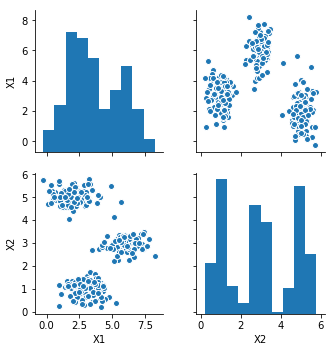

In [4]:
sb.pairplot(data_df)

In [5]:
initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])

data_df = find_closest_centroids(data_df, initial_centroids)  


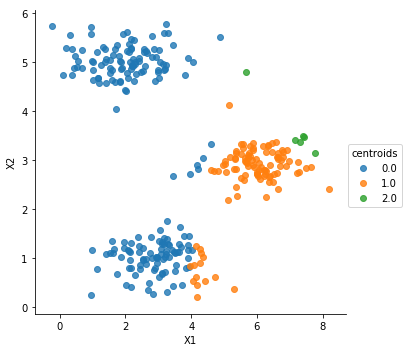

In [6]:
g = sb.lmplot(x="X1", y="X2",hue="centroids" ,data=data_df,fit_reg=False)


Next we need a function to compute the centroid of a cluster. The centroid is simply the mean of all of the examples currently assigned to the cluster.

Given assignments of every point to a centroid, the second phase of the algorithm recomputes, for each centroid, the mean of the points that were assigned to it. Concretely,
if two examples say x(3) and x(5) are assigned to centroid k = 2, then you
should update μ2 = 1/2 (x(3) + x(5)).

In [7]:
def compute_centroids(X, k):  
    m, n = X.shape
    centroids = []
    #np.zeros((k, n))
    
    for i in range(k): 
        X_k = X[X['centroids']==i]

        c = []
        for i in X_k.columns:
            if i =='centroids':
                continue
            else:
                centroids_Xi = X_k[i].sum()/float(X_k.shape[0])
                c.append(centroids_Xi)
        
                print centroids_Xi, i
        centroids.append(c)
                          
    return np.array(centroids)

In [8]:
centroids = compute_centroids(data_df, 3)  
centroids

2.428301112098195 X1
3.157924176603566 X2
5.813503308520714 X1
2.6336564514030263 X2
7.1193868715087545 X1
3.6166843987216186 X2


array([[2.42830111, 3.15792418],
       [5.81350331, 2.63365645],
       [7.11938687, 3.6166844 ]])

 Now we have to run the algorithm for some number of iterations and visualizing the result. We have to random initialize the centroids with the following function. 

In [9]:
def init_centroids(X, k):  
    m, n = X.shape
    centroids = []
    idx = np.random.randint(0, m, k)

    X_columns = X.columns
    
    average = 0
    
    for i in X_columns:
        average = average + X[i].max()
    
    
    for i in range(k):
        idx = np.random.randint(0, 10, n)
        centroids.append(idx)

    return np.array(centroids)

init_centroids(data_df[['X1','X2']], 3)  

array([[7, 9],
       [8, 6],
       [0, 7]])

Running the algorithm iteratively:

In [10]:
def run_k_means(X, initial_centroids, max_iters):  
    m, n = X.shape
    k = initial_centroids.shape[0]
    idx = np.zeros(m)
    centroids = initial_centroids

    for i in range(max_iters):
        X = X.drop(['centroids'], axis=1)
        X = find_closest_centroids(X, centroids)  
        centroids = compute_centroids(X, k)
        print centroids
        #g = sb.lmplot(x="X1", y="X2",hue="centroids" ,data=X,fit_reg=False)
    
    #data_df = find_closest_centroids(X[['X1', 'X2']], centroids)  

    return X, centroids



In [11]:
initial_centroids = init_centroids(data_df[['X1','X2']], 3)  
print initial_centroids

data_df, centroids = run_k_means(data_df, initial_centroids, 10)  

[[7 6]
 [9 5]
 [1 2]]
5.691046156036645 X1
3.212878168948651 X2
7.236118626036589 X1
2.9861690975380393 X2
2.5339235209434223 X1
2.8918773757200458 X2
[[5.69104616 3.21287817]
 [7.23611863 2.9861691 ]
 [2.53392352 2.89187738]]
5.554018082565625 X1
2.935435696680776 X2
6.9826272900976685 X1
2.988702523490172 X2
2.449263353850803 X1
3.0073676123324105 X2
[[5.55401808 2.9354357 ]
 [6.98262729 2.98870252]
 [2.44926335 3.00736761]]
5.282509988245782 X1
2.6009318185953196 X2
6.8370963639970554 X1
2.9960563307711725 X2
2.355800182078164 X1
3.1489533489042545 X2
[[5.28250999 2.60093182]
 [6.83709636 2.99605633]
 [2.35580018 3.14895335]]
4.882178673261709 X1
2.2257455946577136 X2
6.701843040836596 X1
2.9999191613121323 X2
2.2183154826204454 X1
3.375568364646041 X2
[[4.88217867 2.22574559]
 [6.70184304 2.99991916]
 [2.21831548 3.37556836]]
3.9684800416438395 X1
1.5272715739260971 X2
6.367548825937442 X1
3.038212161274588 X2
1.9928226874074693 X1
3.979445731644179 X2
[[3.96848004 1.52727157]
 [6.

## Imagen Compresion

Our next task is to apply K-means to image compression. The intuition here is that we can use clustering to find a small number of colors that are most representative of the image, and map the original 24-bit colors to a lower-dimensional color space using the cluster assignments. Here's the image we're going to compress.



![alt text](Screen Shot 2018-06-29 at 12.13.29.png "Title")

In [12]:
image_data = loadmat('../data/machine-learning-ex7/ex7/bird_small.mat')  
A = image_data['A']   

Now we need to apply some pre-processing to the data and feed it into the K-means algorithm.



In [13]:
# normalize value ranges
A = A / 255.

# reshape the array
X = np.reshape(A, (A.shape[0] * A.shape[1], A.shape[2]))

data_df_image = pd.DataFrame(X,columns = ['X1','X2','X3'])


In [14]:
initial_centroids = init_centroids(data_df_image, 16)  
initial_centroids

array([[3, 0, 3],
       [9, 6, 5],
       [4, 9, 4],
       [9, 0, 9],
       [9, 7, 8],
       [8, 8, 0],
       [0, 5, 4],
       [6, 2, 0],
       [4, 3, 2],
       [3, 9, 0],
       [9, 8, 7],
       [3, 9, 1],
       [3, 4, 7],
       [8, 8, 2],
       [7, 4, 8],
       [9, 8, 6]])

In [15]:
data_df_image = find_closest_centroids(data_df_image, initial_centroids)  
data_df_image

,X1,X2,X3,centroids
0,0.858824,0.705882,0.403922,0.0
1,0.901961,0.725490,0.454902,0.0
2,0.886275,0.729412,0.431373,0.0
3,0.874510,0.725490,0.411765,0.0
4,0.882353,0.701961,0.403922,0.0
5,0.894118,0.733333,0.450980,0.0
6,0.894118,0.725490,0.435294,0.0
7,0.894118,0.733333,0.447059,0.0
8,0.882353,0.717647,0.419608,0.0
9,0.854902,0.674510,0.376471,0.0


In [16]:
data_df, centroids = run_k_means(data_df_image, initial_centroids, 10)  

0.5307992972579656 X1
0.460244571461397 X2
0.3580647786458333 X3
nan X1
nan X2
nan X3
nan X1
nan X2
nan X3
nan X1
nan X2
nan X3
nan X1
nan X2
nan X3
nan X1
nan X2
nan X3
nan X1
nan X2
nan X3
nan X1
nan X2
nan X3
nan X1
nan X2
nan X3
nan X1
nan X2
nan X3
nan X1
nan X2
nan X3
nan X1
nan X2
nan X3
nan X1
nan X2
nan X3
nan X1
nan X2
nan X3
nan X1
nan X2
nan X3
nan X1
nan X2
nan X3
[[0.5307993  0.46024457 0.35806478]
 [       nan        nan        nan]
 [       nan        nan        nan]
 [       nan        nan        nan]
 [       nan        nan        nan]
 [       nan        nan        nan]
 [       nan        nan        nan]
 [       nan        nan        nan]
 [       nan        nan        nan]
 [       nan        nan        nan]
 [       nan        nan        nan]
 [       nan        nan        nan]
 [       nan        nan        nan]
 [       nan        nan        nan]
 [       nan        nan        nan]
 [       nan        nan        nan]]


/Users/camilarangelsmith/Code/Test/venv/lib/python2.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  


nan X1
nan X2
nan X3
0.5307992972579656 X1
0.460244571461397 X2
0.3580647786458333 X3
nan X1
nan X2
nan X3
nan X1
nan X2
nan X3
nan X1
nan X2
nan X3
nan X1
nan X2
nan X3
nan X1
nan X2
nan X3
nan X1
nan X2
nan X3
nan X1
nan X2
nan X3
nan X1
nan X2
nan X3
nan X1
nan X2
nan X3
nan X1
nan X2
nan X3
nan X1
nan X2
nan X3
nan X1
nan X2
nan X3
nan X1
nan X2
nan X3
nan X1
nan X2
nan X3
[[       nan        nan        nan]
 [0.5307993  0.46024457 0.35806478]
 [       nan        nan        nan]
 [       nan        nan        nan]
 [       nan        nan        nan]
 [       nan        nan        nan]
 [       nan        nan        nan]
 [       nan        nan        nan]
 [       nan        nan        nan]
 [       nan        nan        nan]
 [       nan        nan        nan]
 [       nan        nan        nan]
 [       nan        nan        nan]
 [       nan        nan        nan]
 [       nan        nan        nan]
 [       nan        nan        nan]]
0.5307992972579656 X1
0.460244571461397 X2


In [17]:
data_df

,X1,X2,X3,centroids
0,0.858824,0.705882,0.403922,1.0
1,0.901961,0.725490,0.454902,1.0
2,0.886275,0.729412,0.431373,1.0
3,0.874510,0.725490,0.411765,1.0
4,0.882353,0.701961,0.403922,1.0
5,0.894118,0.733333,0.450980,1.0
6,0.894118,0.725490,0.435294,1.0
7,0.894118,0.733333,0.447059,1.0
8,0.882353,0.717647,0.419608,1.0
9,0.854902,0.674510,0.376471,1.0


In [18]:
data_df_image = find_closest_centroids(data_df[['X1','X2','X3']], centroids)  


data_df_image

,X1,X2,X3,centroids
0,0.858824,0.705882,0.403922,0.0
1,0.901961,0.725490,0.454902,0.0
2,0.886275,0.729412,0.431373,0.0
3,0.874510,0.725490,0.411765,0.0
4,0.882353,0.701961,0.403922,0.0
5,0.894118,0.733333,0.450980,0.0
6,0.894118,0.725490,0.435294,0.0
7,0.894118,0.733333,0.447059,0.0
8,0.882353,0.717647,0.419608,0.0
9,0.854902,0.674510,0.376471,0.0


In [19]:
idx = data_df_image['centroids']
X_recovered = centroids[idx.astype(int),:]
# reshape to the original dimensions
centroids

array([[       nan,        nan,        nan],
       [0.5307993 , 0.46024457, 0.35806478],
       [       nan,        nan,        nan],
       [       nan,        nan,        nan],
       [       nan,        nan,        nan],
       [       nan,        nan,        nan],
       [       nan,        nan,        nan],
       [       nan,        nan,        nan],
       [       nan,        nan,        nan],
       [       nan,        nan,        nan],
       [       nan,        nan,        nan],
       [       nan,        nan,        nan],
       [       nan,        nan,        nan],
       [       nan,        nan,        nan],
       [       nan,        nan,        nan],
       [       nan,        nan,        nan]])

/Users/camilarangelsmith/Code/Test/venv/lib/python2.7/site-packages/numpy/core/_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)


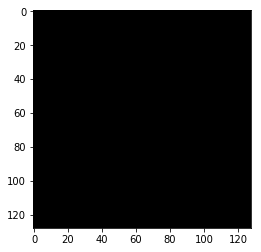

In [20]:
X_recovered = np.reshape(X_recovered, (A.shape[0], A.shape[1], A.shape[2]))

plt.imshow(X_recovered)  

In [21]:
for i in data_df_image.columns:
    print i


X1
X2
X3
centroids
